In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from scipy.stats.mstats import normaltest

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from catboost import CatBoostRegressor

%matplotlib inline


In [2]:
df = pd.read_csv("C:/Users/sieji/Data Science projects/resale_flat_prices/flat-prices.csv")

In [3]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

month - 0.0%
town - 0.0%
flat_type - 0.0%
block - 0.0%
street_name - 0.0%
storey_range - 0.0%
floor_area_sqm - 0.0%
flat_model - 0.0%
lease_commence_date - 0.0%
resale_price - 0.0%


In [5]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [6]:
df = df.sort_values('resale_price', ascending=False)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
141510,1996-11,BISHAN,EXECUTIVE,102,BISHAN ST 12,22 TO 24,163.0,MAISONETTE,1987,900000
128456,1996-06,YISHUN,EXECUTIVE,652,YISHUN AVE 4,01 TO 03,187.0,APARTMENT,1992,883000
132229,1996-08,BISHAN,EXECUTIVE,117,BISHAN ST 12,22 TO 24,163.0,MAISONETTE,1987,870000
138211,1996-10,BISHAN,EXECUTIVE,285,BISHAN ST 22,19 TO 21,172.0,MAISONETTE,1992,868000
147038,1997-01,BISHAN,EXECUTIVE,173,BISHAN ST 13,19 TO 21,163.0,MAISONETTE,1987,840000
...,...,...,...,...,...,...,...,...,...,...
11486,1990-12,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,01 TO 03,31.0,IMPROVED,1977,6000
9585,1990-10,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,5800
19376,1991-08,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,01 TO 03,31.0,IMPROVED,1977,5700
2440,1990-03,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,01 TO 03,31.0,IMPROVED,1977,5600


In [7]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
dtype: object

In [8]:
df2=df
for col_name in df2:
    if (df2[col_name].dtype == 'object'):
        df2[col_name]=df2[col_name].astype('category')
        df2[col_name]=df2[col_name].cat.codes
        
df2.dtypes

month                     int8
town                      int8
flat_type                 int8
block                    int16
street_name              int16
storey_range              int8
floor_area_sqm         float64
flat_model                int8
lease_commence_date      int64
resale_price             int64
dtype: object

In [9]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
141510,82,2,5,6,37,7,163.0,4,1987,900000
128456,77,25,5,697,397,0,187.0,1,1992,883000
132229,79,2,5,28,37,7,163.0,4,1987,870000
138211,81,2,5,243,39,6,172.0,4,1992,868000
147038,84,2,5,94,38,6,163.0,4,1987,840000


In [10]:
df2.corr()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
month,1.000000,0.063785,0.121379,0.043369,0.062714,-0.030522,0.139704,-0.066884,0.254492,0.494324
town,0.063785,1.000000,0.120933,0.084155,0.797037,-0.063973,0.123693,-0.142467,0.190741,0.083833
flat_type,0.121379,0.120933,1.000000,0.040053,0.127818,0.043522,0.958644,-0.350747,0.518430,0.786381
block,0.043369,0.084155,0.040053,1.000000,0.108217,-0.010444,0.039134,0.011094,0.082122,0.036689
street_name,0.062714,0.797037,0.127818,0.108217,1.000000,-0.064697,0.132963,-0.122777,0.242309,0.099892
storey_range,-0.030522,-0.063973,0.043522,-0.010444,-0.064697,1.000000,0.025709,-0.073575,-0.113565,0.062945
floor_area_sqm,0.139704,0.123693,0.958644,0.039134,0.132963,0.025709,1.000000,-0.385076,0.578492,0.797014
flat_model,-0.066884,-0.142467,-0.350747,0.011094,-0.122777,-0.073575,-0.385076,1.000000,-0.198785,-0.332179
lease_commence_date,0.254492,0.190741,0.518430,0.082122,0.242309,-0.113565,0.578492,-0.198785,1.000000,0.505069
resale_price,0.494324,0.083833,0.786381,0.036689,0.099892,0.062945,0.797014,-0.332179,0.505069,1.000000


In [11]:
#From numerical values, seems like floor_area_sqm, lease_commence_date, and flat_type has a high correlation

Text(0, 0.5, 'Resale price')

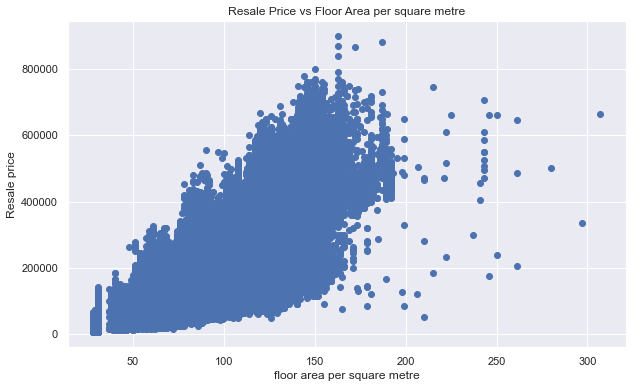

In [12]:
##visualising the 3 features vs resale_price
plt.figure(figsize=(10,6))
plt.scatter(x=df2['floor_area_sqm'], y=df['resale_price'])
plt.title('Resale Price vs Floor Area per square metre')
plt.xlabel('floor area per square metre')
plt.ylabel('Resale price')
##scatterplot shows  upward trend for resale price as floor area per sqm increases

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

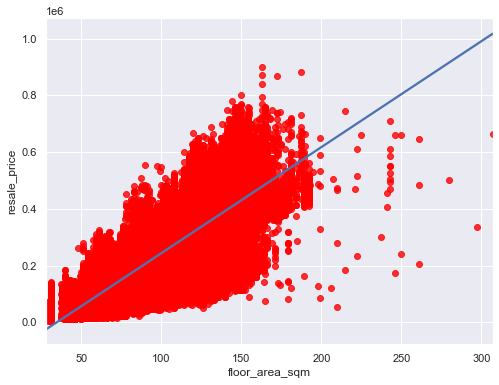

In [13]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x='floor_area_sqm', y='resale_price',data=df2, scatter_kws={'color':'red'})

In [14]:
corr_matrix = df2.corr(method='pearson')
corr_matrix

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
month,1.000000,0.063785,0.121379,0.043369,0.062714,-0.030522,0.139704,-0.066884,0.254492,0.494324
town,0.063785,1.000000,0.120933,0.084155,0.797037,-0.063973,0.123693,-0.142467,0.190741,0.083833
flat_type,0.121379,0.120933,1.000000,0.040053,0.127818,0.043522,0.958644,-0.350747,0.518430,0.786381
block,0.043369,0.084155,0.040053,1.000000,0.108217,-0.010444,0.039134,0.011094,0.082122,0.036689
street_name,0.062714,0.797037,0.127818,0.108217,1.000000,-0.064697,0.132963,-0.122777,0.242309,0.099892
storey_range,-0.030522,-0.063973,0.043522,-0.010444,-0.064697,1.000000,0.025709,-0.073575,-0.113565,0.062945
floor_area_sqm,0.139704,0.123693,0.958644,0.039134,0.132963,0.025709,1.000000,-0.385076,0.578492,0.797014
flat_model,-0.066884,-0.142467,-0.350747,0.011094,-0.122777,-0.073575,-0.385076,1.000000,-0.198785,-0.332179
lease_commence_date,0.254492,0.190741,0.518430,0.082122,0.242309,-0.113565,0.578492,-0.198785,1.000000,0.505069
resale_price,0.494324,0.083833,0.786381,0.036689,0.099892,0.062945,0.797014,-0.332179,0.505069,1.000000


Text(0.5, 1.0, 'Features correlation heatmap')

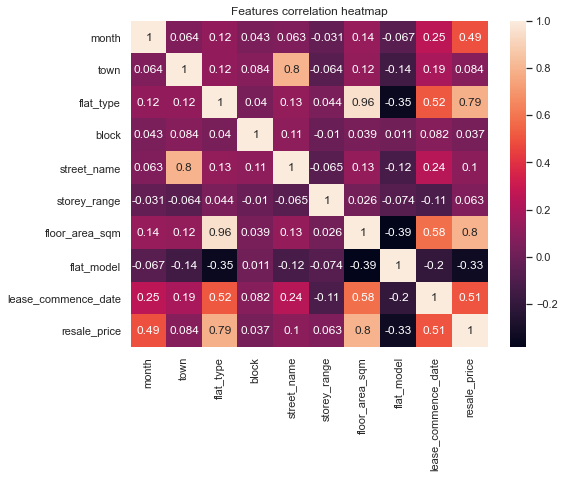

In [15]:
ax=plt.axes()
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(corr_matrix, annot=True, ax=ax)
ax.set_title("Features correlation heatmap")

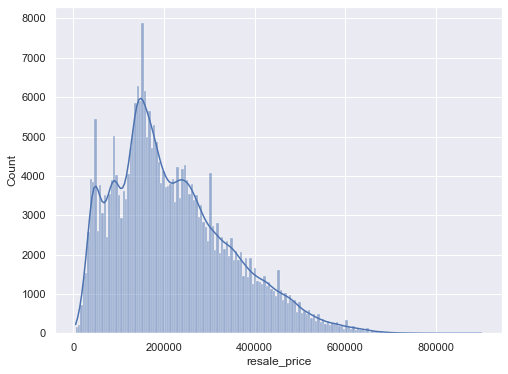

In [16]:
sns.histplot(df2['resale_price'], kde=True);
##checking to see if target variable resale price is skewed

In [17]:
df2['resale_price'].skew()

0.7535297190596468

In [18]:
X = df2.drop(['resale_price'], axis=1)
y = np.log(df2.resale_price)#applying log transformation

In [19]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(X[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,month,-0.635785,0.635785,True
1,town,0.025025,0.025025,False
2,flat_type,0.569853,0.569853,True
3,block,0.640571,0.640571,True
4,street_name,0.048871,0.048871,False
5,storey_range,0.863831,0.863831,True
6,floor_area_sqm,0.532400,0.532400,True
7,flat_model,0.122398,0.122398,False
8,lease_commence_date,-0.354468,0.354468,False


In [20]:
X = X.drop(['town','street_name','storey_range','block'], axis=1)
##dropping the columns that have insignificant corr value to resale_price

In [21]:
X.head()

,month,flat_type,floor_area_sqm,flat_model,lease_commence_date
141510,82,5,163.0,4,1987
128456,77,5,187.0,1,1992
132229,79,5,163.0,4,1987
138211,81,5,172.0,4,1992
147038,84,5,163.0,4,1987


In [22]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [23]:
#modelling
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.2991052247872346
R-square: 0.8114212960710185


In [25]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.14344338804680223
R-square: 0.956628372742875


In [27]:
##catboost??
catboost = CatBoostRegressor(verbose= 0)
catboost.fit(X_train, y_train)
predictions_cb = catboost.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_cb))
r2 = r2_score(y_test, predictions_cb)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.1347332179581456
R-square: 0.9617356788447011


In [29]:
##performance of catboost and random forest outperforms multi-variate linear regression. Combining models:
combined_predictions = (
    0.8 * predictions_cb+
    0.2 * predictions_rf
)

In [30]:
rmse = np.sqrt(mean_squared_error(y_test, combined_predictions))
r2 = r2_score(y_test, combined_predictions)
print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.13415218999706854
R-square: 0.9620649918746125


In [31]:
combined_predictions = np.exp(combined_predictions)

In [32]:
y_test = np.exp(y_test)

In [33]:
pd.DataFrame({'Actual': y_test, 'Predicted': combined_predictions.round(2)})

,Actual,Predicted
122099,180000.0,167278.88
14451,108000.0,123635.82
273418,336000.0,343582.73
120023,298000.0,277306.56
260128,112000.0,112741.79
...,...,...
252770,246000.0,249772.39
108984,239000.0,242470.15
185744,132000.0,153453.78
129010,486000.0,503657.19


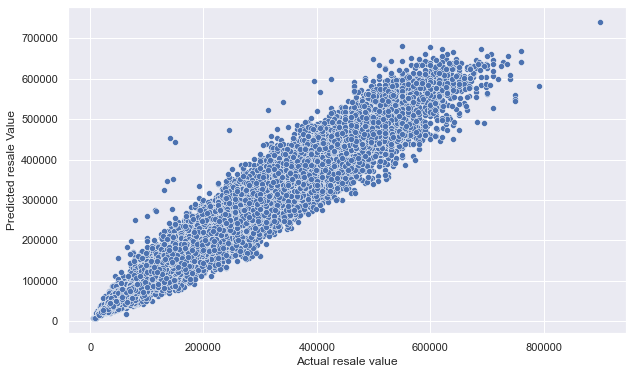

In [34]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= combined_predictions)
plt.xlabel('Actual resale value')
plt.ylabel('Predicted resale Value')
plt.show()

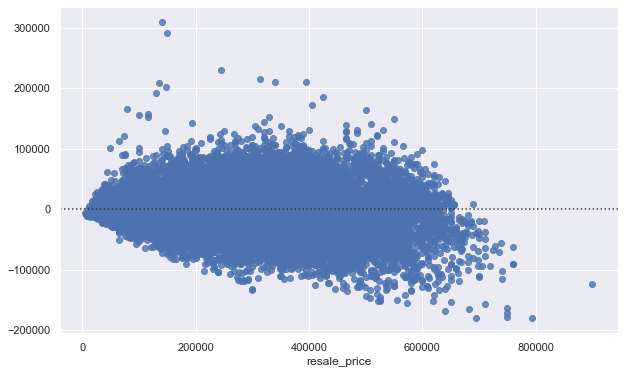

In [35]:
plt.figure(figsize= (10, 6))
sns.residplot(x= y_test, y = combined_predictions)
plt.show()

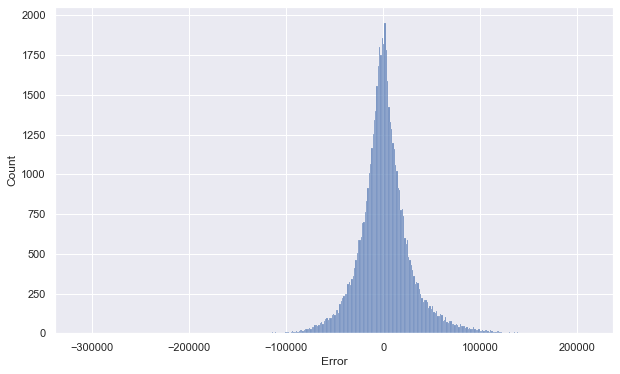

In [36]:
resid = y_test - combined_predictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');
##model works pretty well as seen from the normal distribution below